In [1]:
import quandl
quandl.ApiConfig.api_key = ''
import numpy as np
import pandas as pd

In [50]:
prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'KO','NKE', 'TSLA', 'DIS'], date={'gte':'2018-09-01', 'lte':'2019-12-31'}, paginate=True)

In [51]:
prices.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
None,,,,,,,,,,
0,TSLA,2018-12-31,337.79,339.210,325.260,332.80,6270960.0,0.0,332.80,2018-12-31
1,TSLA,2018-12-28,323.10,336.240,318.410,333.87,9888522.0,0.0,333.87,2018-12-28
2,TSLA,2018-12-27,319.84,322.172,301.500,316.13,8500894.0,0.0,316.13,2018-12-27
3,TSLA,2018-12-26,300.00,326.970,294.090,326.09,8023770.0,0.0,326.09,2018-12-26
4,TSLA,2018-12-24,313.50,314.500,295.195,295.39,5554619.0,0.0,295.39,2018-12-28


In [45]:
prices.tail()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
None,,,,,,,,,,


In [28]:
pivoted = prices.pivot(index='date', columns='ticker', values='close')
pivoted.head()

ticker,AAPL,DIS,KO,NKE,TSLA
date,,,,,
2018-09-04,228.36,110.85,44.76,79.60,288.95
2018-09-05,226.87,109.87,45.38,79.92,280.74
2018-09-06,223.10,110.26,45.77,80.40,280.95
2018-09-07,221.30,110.97,45.72,80.30,263.24
2018-09-10,218.33,110.68,46.06,82.10,285.50


In [29]:
pivoted.shape

(82, 5)

In [30]:
pivoted.pct_change()

ticker,AAPL,DIS,KO,NKE,TSLA
date,,,,,
2018-09-04,NaN,NaN,NaN,NaN,NaN
2018-09-05,-0.006525,-0.008841,0.013852,0.004020,-0.028413
2018-09-06,-0.016617,0.003550,0.008594,0.006006,0.000748
2018-09-07,-0.008068,0.006439,-0.001092,-0.001244,-0.063036
2018-09-10,-0.013421,-0.002613,0.007437,0.022416,0.084562
...,...,...,...,...,...
2018-12-24,-0.025874,-0.037133,-0.033845,-0.059002,-0.076242
2018-12-26,0.070422,0.054609,0.021323,0.072100,0.103930
2018-12-27,-0.006490,0.006520,0.012569,0.009040,-0.030544


# Variance 

In [53]:
aapl = pivoted['AAPL']
aapl

date
2018-09-04    228.36
2018-09-05    226.87
2018-09-06    223.10
2018-09-07    221.30
2018-09-10    218.33
               ...  
2018-12-24    146.83
2018-12-26    157.17
2018-12-27    156.15
2018-12-28    156.23
2018-12-31    157.74
Name: AAPL, Length: 82, dtype: float64

In [58]:
aapl_pct = pivoted['AAPL'].pct_change()
aapl_pct

date
2018-09-04         NaN
2018-09-05   -0.006525
2018-09-06   -0.016617
2018-09-07   -0.008068
2018-09-10   -0.013421
                ...   
2018-12-24   -0.025874
2018-12-26    0.070422
2018-12-27   -0.006490
2018-12-28    0.000512
2018-12-31    0.009665
Name: AAPL, Length: 82, dtype: float64

In [61]:
aapl = pivoted['AAPL'].pct_change().apply(lambda x: np.log(1+x))
aapl

date
2018-09-04         NaN
2018-09-05   -0.006546
2018-09-06   -0.016757
2018-09-07   -0.008101
2018-09-10   -0.013512
                ...   
2018-12-24   -0.026215
2018-12-26    0.068053
2018-12-27   -0.006511
2018-12-28    0.000512
2018-12-31    0.009619
Name: AAPL, Length: 82, dtype: float64

In [62]:
mean_aapl = aapl.sum()/aapl.count()
mean_aapl

-0.004567595347237202

In [63]:
aapl.mean()

-0.004567595347237202

In [65]:
#square deviation to preserve deviation and prevent 0
sqd_aapl = aapl.apply(lambda x: (x-mean_aapl)**2)
sqd_aapl

date
2018-09-04         NaN
2018-09-05    0.000004
2018-09-06    0.000149
2018-09-07    0.000012
2018-09-10    0.000080
                ...   
2018-12-24    0.000469
2018-12-26    0.005274
2018-12-27    0.000004
2018-12-28    0.000026
2018-12-31    0.000201
Name: AAPL, Length: 82, dtype: float64

In [66]:
#Sum up squared deviation of Apple stock
ssqd_aapl = sqd_aapl.sum()
ssqd_aapl

0.044229969504156696

In [67]:
var_aapl = ssqd_aapl/(aapl.count()-1)
var_aapl

0.0005528746188019587

In [68]:
aapl.var()

0.0005528746188019586

# Standard Deviation

# Determining stock volatility in Q4 2018

In [70]:
daily_sd = np.sqrt(var_aapl)
daily_sd

0.0235132860060426

In [87]:
quarter_sd = daily_sd*np.sqrt(82)
quarter_sd

0.21292186064789265

In [88]:
daily_sd_tickers = pivoted.pct_change().apply(lambda x: np.log(1+x)).std()
daily_sd_tickers

ticker
AAPL    0.023513
DIS     0.015608
KO      0.010649
NKE     0.021951
TSLA    0.043917
dtype: float64

In [92]:
quarter_sd_tickers = pivoted.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(82))
quarter_sd_tickers

ticker
AAPL    0.212922
DIS     0.141333
KO      0.096429
NKE     0.198778
TSLA    0.397682
dtype: float64

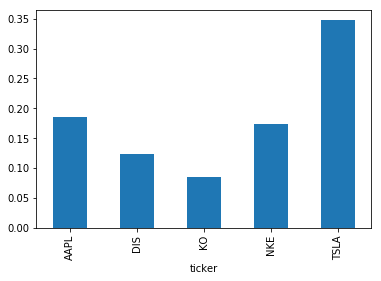

In [93]:
bar = pivoted.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(62.5)).plot(kind='bar')
bar

# Covariance 

# Measurement of a relationship between two variables

In [94]:
aapl_tsla_prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'TSLA'], date={'gte':'2018-09-01', 'lte':'2019-12-31'}, paginate=True)
aapl_tsla_prices.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
None,,,,,,,,,,
0,TSLA,2018-12-31,337.79,339.210,325.260,332.80,6270960.0,0.0,332.80,2018-12-31
1,TSLA,2018-12-28,323.10,336.240,318.410,333.87,9888522.0,0.0,333.87,2018-12-28
2,TSLA,2018-12-27,319.84,322.172,301.500,316.13,8500894.0,0.0,316.13,2018-12-27
3,TSLA,2018-12-26,300.00,326.970,294.090,326.09,8023770.0,0.0,326.09,2018-12-26
4,TSLA,2018-12-24,313.50,314.500,295.195,295.39,5554619.0,0.0,295.39,2018-12-28


In [96]:
aapl_tsla_pivoted = aapl_tsla_prices.pivot(index='date', columns='ticker', values='close')
aapl_tsla_pivoted.head()

ticker,AAPL,TSLA
date,,
2018-09-04,228.36,288.95
2018-09-05,226.87,280.74
2018-09-06,223.10,280.95
2018-09-07,221.30,263.24
2018-09-10,218.33,285.50


In [98]:
df = aapl_tsla_pivoted.pct_change()
df.head()

ticker,AAPL,TSLA
date,,
2018-09-04,NaN,NaN
2018-09-05,-0.006525,-0.028413
2018-09-06,-0.016617,0.000748
2018-09-07,-0.008068,-0.063036
2018-09-10,-0.013421,0.084562


In [99]:
mean_aapl = df['AAPL'].mean()
mean_aapl

-0.004285441521160403

In [101]:
mean_tsla = df['TSLA'].mean()
mean_tsla

0.0027066986647509214

In [102]:
df['DEV_AAPL'] = df['AAPL'].apply(lambda x: x-mean_aapl)
df.head()

ticker,AAPL,TSLA,DEV_AAPL
date,,,
2018-09-04,NaN,NaN,NaN
2018-09-05,-0.006525,-0.028413,-0.002239
2018-09-06,-0.016617,0.000748,-0.012332
2018-09-07,-0.008068,-0.063036,-0.003783
2018-09-10,-0.013421,0.084562,-0.009135


In [103]:
df['DEV_TSLA'] = df['TSLA'].apply(lambda x: x-mean_tsla)
df.head()

ticker,AAPL,TSLA,DEV_AAPL,DEV_TSLA
date,,,,
2018-09-04,NaN,NaN,NaN,NaN
2018-09-05,-0.006525,-0.028413,-0.002239,-0.031120
2018-09-06,-0.016617,0.000748,-0.012332,-0.001959
2018-09-07,-0.008068,-0.063036,-0.003783,-0.065743
2018-09-10,-0.013421,0.084562,-0.009135,0.081855


In [104]:
df['CROSS_PRODUCT'] = df['DEV_AAPL']*df['DEV_TSLA']
df.head()

ticker,AAPL,TSLA,DEV_AAPL,DEV_TSLA,CROSS_PRODUCT
date,,,,,
2018-09-04,NaN,NaN,NaN,NaN,NaN
2018-09-05,-0.006525,-0.028413,-0.002239,-0.031120,0.000070
2018-09-06,-0.016617,0.000748,-0.012332,-0.001959,0.000024
2018-09-07,-0.008068,-0.063036,-0.003783,-0.065743,0.000249
2018-09-10,-0.013421,0.084562,-0.009135,0.081855,-0.000748


In [105]:
df['CROSS_PRODUCT'].sum()

0.028778789711730975

In [106]:
df['CROSS_PRODUCT'].sum()/(df['CROSS_PRODUCT'].count()-1)

0.0003597348713966372

In [107]:
df['AAPL'].cov(df['TSLA'])

0.00035973487139663726

# Correlation

In [108]:
var_tsla = df['TSLA'].var()
var_tsla

In [110]:
var_aapl = df['AAPL'].var()
var_aapl

0.0005478603588922476

In [112]:
sd_tsla = df['TSLA'].std()
sd_tsla

0.044532739595041754

In [114]:
sd_aapl = df['AAPL'].std()
sd_aapl

0.023406417045166217

In [115]:
df['TSLA'].cov(df['AAPL'])

0.00035973487139663726

In [116]:
df['TSLA'].cov(df['AAPL'])/(sd_tsla*sd_aapl)

0.34511845757785226

In [117]:
df['TSLA'].corr(df['AAPL'])

0.3451184575778522

In [142]:
df = pivoted.pct_change().apply(lambda x: np.log(1+x))
df.head()

ticker,AAPL,DIS,KO,NKE,TSLA
date,,,,,
2018-09-04,NaN,NaN,NaN,NaN,NaN
2018-09-05,-0.006546,-0.008880,0.013757,0.004012,-0.028825
2018-09-06,-0.016757,0.003543,0.008557,0.005988,0.000748
2018-09-07,-0.008101,0.006419,-0.001093,-0.001245,-0.065111
2018-09-10,-0.013512,-0.002617,0.007409,0.022168,0.081176


In [143]:
#Correlation between Disney and Apple
df['DIS'].corr(df['AAPL'])

0.6562087707296936

In [146]:
df.corr()

ticker,AAPL,DIS,KO,NKE,TSLA
ticker,,,,,
AAPL,1.000000,0.656209,0.176793,0.515308,0.339118
DIS,0.656209,1.000000,0.402177,0.469412,0.285403
KO,0.176793,0.402177,1.000000,0.377657,0.201563
NKE,0.515308,0.469412,0.377657,1.000000,0.308930
TSLA,0.339118,0.285403,0.201563,0.308930,1.000000


# Covariance & Correlation Matrix

In [133]:
all_prices = quandl.get_table('SHARADAR/SEP', date={'gte': '2017-01-01', 'lte': '2019-12-31'}, paginate=True)
all_prices.shape

(2542, 10)

In [137]:
all_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ticker       2542 non-null   object        
 1   date         2542 non-null   datetime64[ns]
 2   open         2542 non-null   float64       
 3   high         2542 non-null   float64       
 4   low          2542 non-null   float64       
 5   close        2542 non-null   float64       
 6   volume       2542 non-null   float64       
 7   dividends    2542 non-null   float64       
 8   closeunadj   2542 non-null   float64       
 9   lastupdated  2542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(1)
memory usage: 198.7+ KB


In [147]:
df = all_prices.pivot(index='date', columns='ticker', values='close').pct_change().apply(lambda x: np.log(1+x))

In [148]:
df.cov()

ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,PFE,PG,TRV,TSLA,UNH,UTX,V,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000553,0.000254,0.000357,0.000330,0.000338,0.000191,0.000259,0.000241,0.000268,0.000298,...,0.000193,0.000068,0.000170,0.000350,0.000269,0.000212,0.000380,0.000022,0.000154,0.000193
AXP,0.000254,0.000279,0.000208,0.000248,0.000238,0.000169,0.000209,0.000174,0.000157,0.000237,...,0.000143,0.000131,0.000142,0.000281,0.000188,0.000182,0.000269,0.000062,0.000127,0.000151
BA,0.000357,0.000208,0.000508,0.000354,0.000275,0.000219,0.000249,0.000169,0.000192,0.000244,...,0.000143,0.000084,0.000155,0.000222,0.000238,0.000187,0.000324,0.000016,0.000173,0.000181
CAT,0.000330,0.000248,0.000354,0.000618,0.000327,0.000256,0.000371,0.000209,0.000146,0.000308,...,0.000193,0.000054,0.000184,0.000184,0.000240,0.000232,0.000355,-0.000005,0.000135,0.000233
CSCO,0.000338,0.000238,0.000275,0.000327,0.000383,0.000208,0.000234,0.000196,0.000154,0.000260,...,0.000195,0.000096,0.000160,0.000309,0.000239,0.000188,0.000343,0.000066,0.000138,0.000188
CVX,0.000191,0.000169,0.000219,0.000256,0.000208,0.000290,0.000155,0.000155,0.000123,0.000179,...,0.000139,0.000079,0.000142,0.000222,0.000172,0.000113,0.000188,0.000049,0.000123,0.000216
DD,0.000259,0.000209,0.000249,0.000371,0.000234,0.000155,0.000385,0.000160,0.000101,0.000237,...,0.000147,0.000066,0.000140,0.000255,0.000185,0.000210,0.000271,0.000019,0.000117,0.000166
DIS,0.000241,0.000174,0.000169,0.000209,0.000196,0.000155,0.000160,0.000244,0.000156,0.000188,...,0.000147,0.000093,0.000117,0.000196,0.000174,0.000156,0.000214,0.000052,0.000126,0.000147
GE,0.000268,0.000157,0.000192,0.000146,0.000154,0.000123,0.000101,0.000156,0.001067,0.000230,...,0.000097,0.000065,0.000120,0.000356,0.000163,0.000137,0.000182,0.000021,0.000109,0.000107


In [149]:
df.corr()

ticker,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,PFE,PG,TRV,TSLA,UNH,UTX,V,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.645995,0.673536,0.564669,0.734035,0.477427,0.560807,0.656209,0.349174,0.642296,...,0.566891,0.185961,0.518922,0.339118,0.680690,0.533748,0.769801,0.071528,0.483116,0.545198
AXP,0.645995,1.000000,0.551432,0.597585,0.727301,0.594679,0.638189,0.668141,0.288262,0.717048,...,0.591275,0.505663,0.610617,0.383275,0.669714,0.645794,0.768425,0.277343,0.560661,0.598855
BA,0.673536,0.551432,1.000000,0.632049,0.623420,0.571308,0.564364,0.481870,0.261337,0.549282,...,0.439183,0.241142,0.493570,0.223962,0.629390,0.491742,0.685727,0.054878,0.565699,0.534062
CAT,0.564669,0.597585,0.632049,1.000000,0.671673,0.604852,0.760665,0.539799,0.180346,0.627769,...,0.537021,0.140192,0.529514,0.168254,0.574218,0.552412,0.680412,-0.015947,0.402268,0.621743
CSCO,0.734035,0.727301,0.623420,0.671673,1.000000,0.623564,0.608477,0.640439,0.240179,0.671347,...,0.688074,0.315397,0.585791,0.358886,0.727611,0.567695,0.834053,0.253643,0.521875,0.637274
CVX,0.477427,0.594679,0.571308,0.604852,0.623564,1.000000,0.462853,0.581180,0.220680,0.531483,...,0.563839,0.298183,0.598103,0.296095,0.600513,0.394783,0.526219,0.213992,0.535055,0.842528
DD,0.560807,0.638189,0.564364,0.760665,0.608477,0.462853,1.000000,0.521181,0.157147,0.612758,...,0.519275,0.216921,0.512623,0.295895,0.563082,0.634664,0.657689,0.071974,0.439729,0.562916
DIS,0.656209,0.668141,0.481870,0.539799,0.640439,0.581180,0.521181,1.000000,0.305501,0.610243,...,0.649298,0.383127,0.537932,0.285403,0.662324,0.592105,0.652938,0.249743,0.596742,0.624260
GE,0.349174,0.288262,0.261337,0.180346,0.240179,0.220680,0.157147,0.305501,1.000000,0.357043,...,0.205183,0.128409,0.262394,0.248281,0.296604,0.247755,0.264960,0.048929,0.246348,0.217780


In [150]:
import matplotlib.pyplot as plt

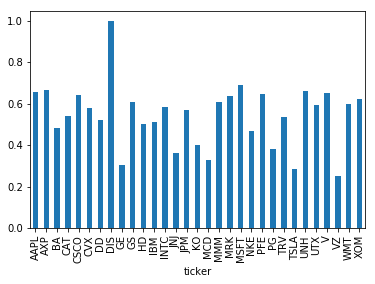

In [151]:
df.corr()['DIS'].plot(kind='bar')